In [ ]:
# !conda install nltk #This installs nltk
# import nltk # Imports the library
# nltk.download() #Download the necessary datasets

In [1]:
import nltk

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [4]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

'\t' indicares tab seperation and shows that this is a tab seperated file (tsv)

In [5]:
# Print the first 10 messages and number them using enumerate
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

We can clearly see the messages have 2 labels - ham and spam.
The ones labeled spam are either advertisement or claim a prize emeil or asking for money

Instead of just parsing the tsv manually, we use pandas

In [6]:
# Passing '\t' to the sep argument to indicate its a tsv
# Naming the column of the Dataframe
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                      names=['label','message'])

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Minor Exploratory Data Analysis, Visualization and Statistics

In [8]:
# General stats
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


We see that there are 2 unique label value 

The number of unique messages (5169) is less than the than the total number of messages (5572) which means that there are repeated messages

In [9]:
# Use groupby and the describe method the label to get the intuition of what seperate ham and spam messages
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

This is an overview of spam vs. ham like how many ham and spam we have, the most frequent (repeated) ham and spam etc

A large part of NLP is feature Engineering so we need to know what features of the message we'll be using

In [10]:
# Lendth column shows how long the messages are
messages['length'] = messages['message'].apply(len)

In [11]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot: ylabel='Frequency'>

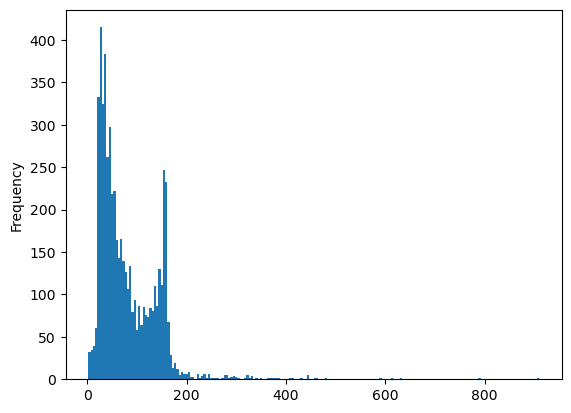

In [12]:
messages['length'].plot.hist(bins=200)

Theres a peak around length 50 and another around 180.

Our counts goes beyond 900, meaning that there are some realy long text messages

In [13]:
messages["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

The max length of a message is 910 words which is a really long message

Finding the message using pandas masking

In [14]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Lets see if message length is a distinguished feature between ham and spam

array([<AxesSubplot: title={'center': 'ham'}>,
       <AxesSubplot: title={'center': 'spam'}>], dtype=object)

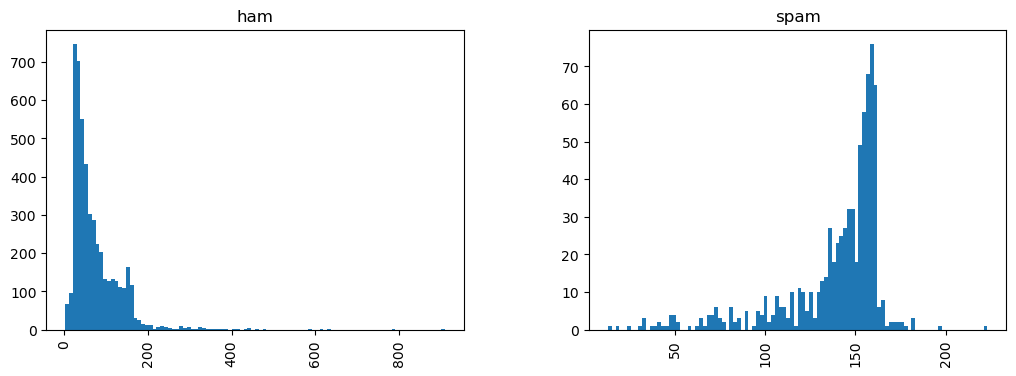

In [15]:
messages.hist(column='length', by='label', bins=100, figsize=(12,4))

In the ham plot we see that ham has less characters, an average between 0 and 200 centered around 50 words

Spam messages tend to have more characters an average centered around 160 words

## Text Pre-processing

 let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). 

In [16]:
import string

In [17]:
# A list of general punctuations from pandas
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
mess = 'Sample message! Notice: it has punctuations.'

# Use string comprehension to check characters of mess to see if they're punctuations and takethe punctuations out
nopunc = [c for c in mess if c not in string.punctuation]
# # the characters of mess that are not punctuations in a list
# nopunc
# Joining the characters of nopunc back to a string
nopunc = ''.join(nopunc)
# Split nopunc into a list
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuations']

Stop words are words that dont tell any distinguishing features

In [19]:
from nltk.corpus import stopwords
# Some stop words
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
# Use listcomprehension to remove any stop words in nopunc
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [21]:
clean_mess

['Sample', 'message', 'Notice', 'punctuations']

Let's put our text processing into a function

In [22]:
def clean_mess(mess):
    #     Remove punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    #   Join the characters to form a list
    nopunc = ''.join(nopunc)
    
    #     Return a list of removed stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

We now Tokenize the message column of our Dataframe messages i.e use the function of the message column

Tokenization is the process of converting a string into tokens i.e words we actually need

In [23]:
# Using the first 5 rows
messages['message'].head(5).apply(clean_mess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vectorization

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Each vector will have as many dimensions as there are unique words in the SMS corpus. We will first use SciKit Learn's CountVectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we can just specify the analyzer to be our own previously defined function (clean_mess)

In [25]:
bow_transformer = CountVectorizer(analyzer=clean_mess).fit(messages['message'])

In [26]:
# Print the total number of unique vocab words in our dictionary
print(len(bow_transformer.vocabulary_))

11425


Let's take one text message and get its bag-of-words counts as a vector

In [27]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [28]:
# Its vector representation
bow4 = bow_transformer.transform([message4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


This means that there are 7 unique words after taking out the stop words in this message and 2 of those words were repeated twice

In [29]:
print(bow4.shape)

(1, 11425)


Confirming which words appear twice

In [30]:
print(bow_transformer.get_feature_names_out()[4068])
print(bow_transformer.get_feature_names_out()[9554])

U
say


we use .transform on our Bag-of-Words (bow) transformed object and transform the entire message column of messages

In [31]:
messages_bow = bow_transformer.transform(messages['message'])

In [32]:
print('Shape of Sparse Matrix: ',messages_bow.shape)
print('Amount of non-Zero occurences: ',messages_bow.nnz)
print('Sparsity: ',(100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of non-Zero occurences:  50548
Sparsity:  0.07940295412668218


## TF-IDF

The term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer

In [34]:
# Make an instance of TfidfTransformer and fit it to our bag of words
tfidf_transformer = TfidfTransformer().fit(messages_bow)

# Transform the simple word count of message4 to a tfidf
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


check what is the IDF (inverse document frequency) of the word "u" and of word "university"?

In [35]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


Transform the entire bag-of-words corpus into TF-IDF corpus at once

In [36]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

With messages represented as vectors, we can finally train our spam/ham classifier using the Naive Bayes classifier algorithm

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

Let's try classifying our single random message tfidf4

In [39]:
print('Prediction: ',spam_detect_model.predict(tfidf4)[0])
print('Actual: ',messages['label'][3])

Prediction:  ham
Actual:  ham


We now predict the label of the entire dataset

In [40]:
all_predictions = spam_detect_model.predict(messages_tfidf)
all_predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'], train_size=0.3)

## Creating a Data Pipeline

Let's run our model again and then predict off the test set using SciKit Learn's pipeline capabilities to store a pipeline of workflow

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_mess)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline will do our pre-processing for us

In [45]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function clean_mess at 0x000002D8B0FC7880>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [46]:
predictions = pipeline.predict(msg_test)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.93      0.97      3632
        spam       0.52      1.00      0.69       269

    accuracy                           0.94      3901
   macro avg       0.76      0.97      0.83      3901
weighted avg       0.97      0.94      0.95      3901

